In [2]:
import sys
import time
print(sys.executable)
from utils import *
import matplotlib.ticker as plticker
import seaborn as sns
import random

/Users/clivian/opt/anaconda3/bin/python


In [3]:
daily_ratings, movie_ratings = loadDic()
# dcount = 0
# mcount = 0
# for day in daily_ratings:
#     if daily_ratings[day].get(2571, -1) != -1:
#         dcount += len(daily_ratings[day][2571])
# for day in movie_ratings[2571]:
#     mcount += movie_ratings[2571][day]
# print(dcount, mcount)

In [17]:

# candidates = {}
# for key in topMovieKeys:
#     if key != -1:
#         candidates[key] = movies[key]
# hit = 0
# for candidate in candidates:
#     if candidate in candidates_actual:
#         hit += 1
#         print(candidate, candidates[candidate], candidates_actual[candidate])
# print(len(candidates_actual))
# print(hit)
        
    

877
0.036203826997792406


In [18]:
# print(len(candidate_time_series))
# print(len(candidates_actual))
# print(len(movies))
# fig, ax = plt.subplots()
# temp_x = [i for i in range(15)]
# x_loc = plticker.MultipleLocator(base=1)
# y_loc = plticker.MultipleLocator(base=5)
# ax.xaxis.set_major_locator(x_loc)
# ax.yaxis.set_major_locator(y_loc)
# ax.set_title('movie time series', loc='center')
# ax.set_xticklabels([i for i in range(15, -1, -1)])
# for series in candidate_time_series:
#     ax.plot(temp_x,
#             series,
#             linewidth=0.05)
# ax.set_xlabel('day')
# ax.set_ylabel('rating count' )
# fig.savefig('./figures/candidate_movie_time_series', bbox_inches='tight', dpi=300)

12893
220
0.02212604991851669
11356
1695
12893


<ipython-input-40-5c5806ab3bde>:65: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + [(plot_line_days - i) for i in range(16)])


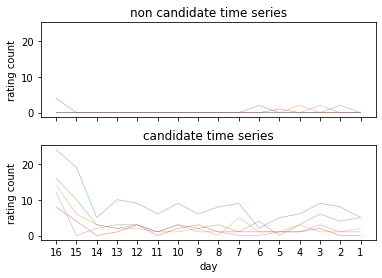

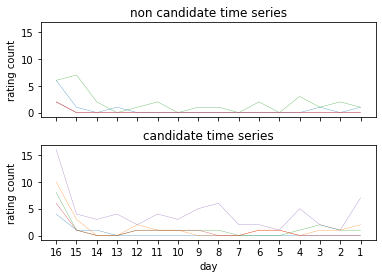

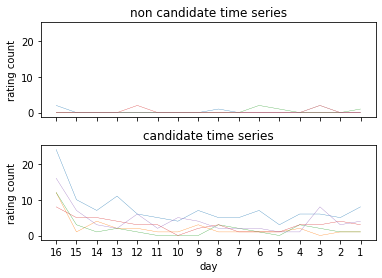

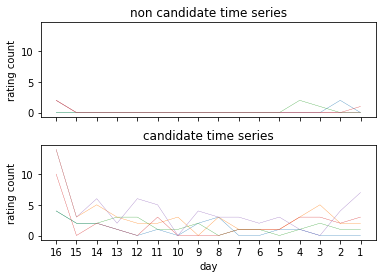

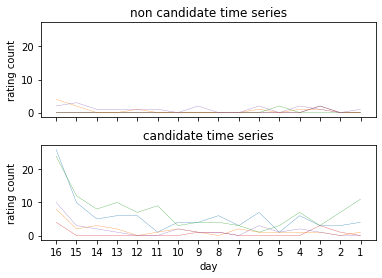

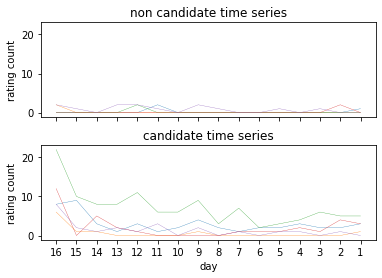

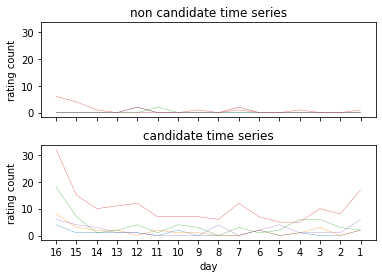

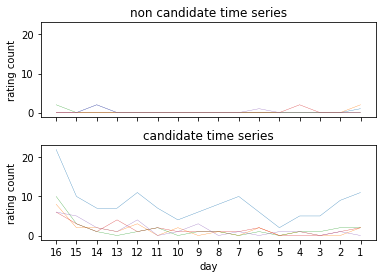

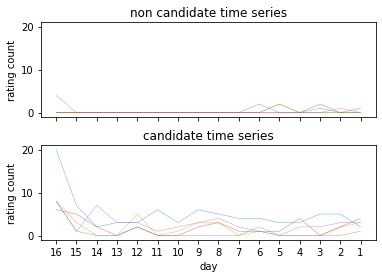

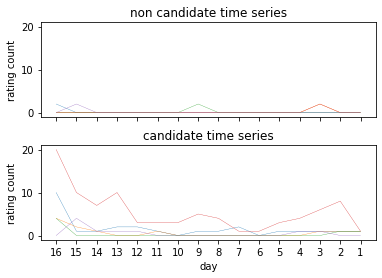

In [40]:
def date_minus(cur_date, delta):
    cur_date = datetime.date(cur_date[0], cur_date[1], cur_date[2])
    res_date = cur_date - datetime.timedelta(delta)
    res_date = str(res_date)
    return int(res_date[0:4]), int(res_date[5:7]), int(res_date[8:10])
cur_date = (2019, 1, 1)
recent_ratings = {}
plot_line_days = 16
for i in range(1, 1 + plot_line_days):
    res_date = date_minus(cur_date, i)
    rating = daily_ratings.get(res_date, -1)
    if rating != -1:
        recent_ratings[res_date] = daily_ratings[res_date]
    else:
        recent_ratings[res_date] = {}
movies = {}
day_n = 0
for rating in recent_ratings:
    for movie in recent_ratings[rating]:
        if movies.get(movie, -1) == -1:
            movies[movie] = [0] * plot_line_days
            movies[movie][day_n] = len(recent_ratings[rating][movie])
        movies[movie][day_n] += len(recent_ratings[rating][movie])
    day_n += 1
print(len(movies))
actual = daily_ratings[cur_date]
candidates_actual = {}
for movie in actual:
    candidates_actual[movie] = len(actual[movie])    
user_activities = getUserActivities(actual)
max_R = getMaxR(user_activities)
print(max_R)
interactions = {}
for movie in movies:
    interactions[movie] = sum(movies[movie])
topMovieKeys = getTopN(interactions, 400)
topMovieKeys.extend([-1] * max_R)
r_precition = RPrecision(user_activities, topMovieKeys)
print(r_precition)
candidate_time_series = []
for movie in movies:
    if movie in candidates_actual:
        temp = [i for i in movies[movie]]
        temp.append(candidates_actual[movie])
        if max(temp) >= 4:
            candidate_time_series.append(temp)
non_candidate_time_series = []
for movie in movies:
    if movie not in candidates_actual:
        non_candidate_time_series.append(movies[movie])
print(len(non_candidate_time_series))
print(len(candidates_actual))
print(len(movies))

for i in range(10):
    fig, axl = plt.subplots(2, sharex=True, sharey=True)
    plt.subplots_adjust(hspace=0.3)
    temp_x = [i for i in range(plot_line_days)]
    x_loc = plticker.MultipleLocator(base=1)
#     y_loc = plticker.MultipleLocator(base=10)
    for ax in axl:
        ax.xaxis.set_major_locator(x_loc)
#         ax.yaxis.set_major_locator(y_loc)
        ax.set_ylabel('rating count')
        ax.set_xticklabels([''] + [(plot_line_days - i) for i in range(16)])
    axl[0].set_title('non candidate time series', loc='center')
    axl[1].set_title('candidate time series', loc='center')
    axl[1].set_xlabel('day')
    for series in random.sample(non_candidate_time_series, 5):
        axl[0].plot(temp_x,
                series,
                linewidth=0.3)
    for series in random.sample(candidate_time_series, 5):
        axl[1].plot(temp_x,
                series[0:plot_line_days],
                linewidth=0.3)
    fig.savefig('./figures/non_candidate_movie_time_series', bbox_inches='tight', dpi=300)

In [4]:
print(len(movies))
candidates_based_on_yesterday = {}
yesterday_threshold = 3
for movie in movies:
    if movies[movie][-1] > yesterday_threshold:
        candidates_based_on_yesterday[movie] = movies[movie]
print(len(candidates_based_on_yesterday))
candiates_keys = [i for i in candidates_based_on_yesterday]

#based on recentPop
# interactions = {}
# for key in candiates_keys:
#     interactions[key] = sum(candidates_based_on_yesterday[key])
# candiates_keys = getTopN(interactions, 400)

candiates_keys.extend([-1] * max_R)
r_precition = RPrecision(user_activities, candiates_keys)
print(r_precition)
for candidate in candidates_based_on_yesterday:
    if candidate in candidates_actual:        
        print(candidate, candidates_based_on_yesterday[candidate], candidates_actual[candidate])


41009
229
0.020520121268501283
1653 [6, 0, 2, 1, 3, 3, 2, 3, 1, 0, 2, 2, 3, 3, 4, 2, 1, 1, 2, 1, 2, 3, 2, 1, 2, 4, 0, 5, 3, 0, 0, 1, 1, 1, 1, 5, 4, 1, 3, 3, 3, 3, 5, 2, 1, 3, 1, 3, 6, 3, 2, 1, 3, 1, 2, 1, 3, 0, 7, 1, 2, 0, 2, 0, 4, 0, 2, 2, 2, 6, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 0, 3, 2, 4, 0, 1, 1, 1, 5, 3, 1, 2, 1, 2, 3, 4, 6, 6, 3, 2, 3, 3, 1, 2, 3, 1, 2, 6, 2, 2, 2, 1, 0, 2, 5, 3, 4, 0, 2, 3, 1, 0, 2, 1, 4, 3, 3, 6, 4, 1, 2, 6, 1, 2, 5, 4, 1, 0, 3, 1, 2, 2, 3, 2, 1, 2, 1, 3, 4, 2, 3, 2, 3, 1, 2, 2, 2, 1, 4, 5, 1, 1, 4, 0, 1, 3, 5, 2, 0, 0, 0, 1, 3, 3, 2, 4, 2, 2, 2, 4, 3, 5, 3, 1, 3, 1, 5, 4, 2, 2, 0, 2, 1, 2, 4, 5, 1, 3, 2, 2, 3, 4, 6, 3, 1, 3, 1, 2, 4, 3, 2, 2, 2, 0, 6, 3, 4, 5, 1, 2, 3, 0, 8, 2, 3, 0, 3, 4, 4, 4, 3, 3, 1, 2, 4, 4, 5, 1, 2, 4, 2, 0, 11, 8, 3, 4, 2, 1, 1, 0, 2, 6, 1, 1, 4, 0, 4, 7, 6, 1, 5, 5, 0, 6, 3, 4, 1, 1, 2, 1, 4, 6, 1, 3, 3, 1, 4, 4, 0, 1, 3, 1, 0, 3, 2, 5, 2, 1, 3, 1, 7, 2, 8, 4, 3, 4, 2, 5, 4, 6, 1, 2, 3, 4, 5, 2, 4, 1, 0, 3, 4, 4, 4, 3, 3, 2, 3, 2, 3, 3,

In [4]:
import sys
import time
print(sys.executable)
from utils import *
import matplotlib.ticker as plticker
import seaborn as sns
daily_ratings, movie_ratings = loadDic()

/Users/clivian/opt/anaconda3/bin/python


In [3]:
# generate the movie timeline file
existing_movie = set()
start = time.time()
movie_timeline = {}
ini = datetime.date(2009, 11, 1)
end = datetime.date(2019, 10, 31)
for i in range(0, (end - ini).days + 1):
    cur = ini + datetime.timedelta(i)
    year, month, day = cur.year, cur.month, cur.day
    ratings = daily_ratings.get((year, month, day), -1)
    if ratings != -1: 
        day_movie = set()
        for movie in ratings:
            day_movie.add(movie)
            if movie not in existing_movie:
                diff = (datetime.date(year, month, day) - ini).days
                movie_timeline[movie] = [0] * diff + [len(ratings[movie])]
                existing_movie.add(movie)
            else:
                movie_timeline[movie].append(len(ratings[movie]))
        for movie in movie_timeline:
            if movie not in day_movie:
                movie_timeline[movie].append(0)
    else:
        for movie in movie_timeline:
            movie_timeline[movie].append(0)
                        
print(len(movie_timeline))
print(len(existing_movie))
# for movie in daily_ratings[(2019, 10, 31)]:
#     print(len(movie_timeline[movie]))
np.save(os.path.join('data', 'movie_timeline.npy'), movie_timeline)
end = time.time()
elapse = end - start
print(elapse)

58594
58594
65.55679416656494


In [18]:
start = time.time()
movie_timeline = np.load(os.path.join('data', 'movie_timeline.npy'), allow_pickle=True).tolist()
def range_lookup(num):
    if num >= 0 and num < 1:
        return 6
    elif num >= 1 and num < 2:
        return 5
    elif num >= 2 and num < 4:
        return 4
    elif num >= 4 and num < 8:
        return 3
    elif num >= 8 and num < 16:
        return 2
    elif num >= 16 and num < 32:
        return 1
    else:
        return 0

candidates = []
non_candidates = []
past_day_num = 64
for i in range(7):
    candidates.append([0] * past_day_num)
    non_candidates.append([0] * past_day_num)
fir = datetime.date(2009, 11, 1)
ini = datetime.date(2014, 11, 1)
gap = (ini - fir).days
end = datetime.date(2019, 10, 31)
for i in range(0, (end - ini).days + 1):
    cur = ini + datetime.timedelta(i)
    ratings = daily_ratings.get((cur.year, cur.month, cur.day), -1)
    if ratings != -1: 
        possible_candidates = set()
        actual_rated = set()
        for movie in ratings:
            actual_rated.add(movie)
        for j in range(past_day_num, 0, -1):
            pre = cur - datetime.timedelta(j)
            ratings = daily_ratings.get((pre.year, pre.month, pre.day), -1)
            if ratings != -1:
                for movie in ratings:
                    possible_candidates.add(movie)
        for movie in possible_candidates:
            timeline = movie_timeline[movie][gap + i - past_day_num: gap + i]
            if movie in actual_rated:
                for k in range(0, past_day_num):
                    y_range = range_lookup(timeline[k])
                    candidates[y_range][k] += 1
            else:
                for k in range(0, past_day_num):
                    y_range = range_lookup(timeline[k])
                    non_candidates[y_range][k] += 1
    else:
        print('invalid', cur.year, cur.month, cur.day)
end = time.time()
elapse = end - start
print(elapse)

invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8
569.755569934845


[[1360, 1349, 1350, 1355, 1356, 1339, 1340, 1351, 1342, 1349, 1345, 1331, 1348, 1339, 1350, 1353, 1351, 1363, 1357, 1357, 1350, 1344, 1392, 1415, 1418, 1417, 1406, 1401, 1405, 1412, 1411, 1403, 1415, 1412, 1404, 1409, 1407, 1414, 1432, 1431, 1412, 1409, 1408, 1403, 1429, 1423, 1422, 1417, 1414, 1418, 1430, 1439, 1426, 1430, 1422, 1417, 1419, 1424, 1435, 1434, 1439, 1441, 1441, 1446], [14596, 14606, 14565, 14622, 14613, 14524, 14584, 14579, 14575, 14610, 14572, 14557, 14517, 14553, 14590, 14561, 14612, 14595, 14559, 14573, 14585, 14498, 14748, 14836, 14846, 14804, 14782, 14751, 14803, 14856, 14858, 14814, 14825, 14862, 14820, 14852, 14801, 14865, 14905, 14886, 14882, 14853, 14854, 14882, 14899, 14879, 14883, 14848, 14897, 14873, 14918, 14935, 14938, 14872, 14857, 14894, 14842, 14914, 14967, 14934, 14925, 14950, 14961, 14990], [106510, 106709, 106541, 106533, 106469, 106355, 106558, 106718, 106917, 106878, 106729, 106565, 106634, 106705, 106923, 107036, 107052, 106846, 106729, 106734, 10

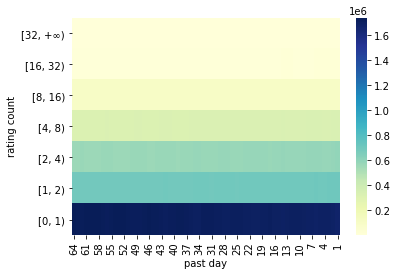

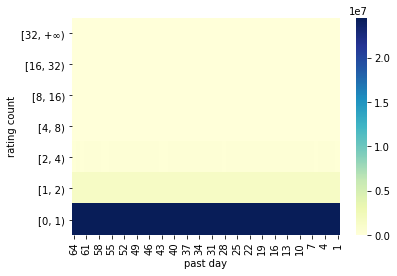

In [19]:
print(candidates)
print(non_candidates)
past_day_num = 64
fig, ax = plt.subplots()
ax = sns.heatmap(candidates, cmap="YlGnBu")
ax.set_xticklabels([str(i) for i in range(past_day_num, 0, -3)])
ax.set_yticklabels(['[32, +∞)', '[16, 32)', '[8, 16)', '[4, 8)', '[2, 4)', '[1, 2)', '[0, 1)'],
                   rotation='horizontal')
ax.set_xlabel('past day')
ax.set_ylabel('rating count')
fig.savefig('./figures/candidate_movie_time_series.png', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
ax = sns.heatmap(non_candidates, cmap="YlGnBu")
ax.set_xticklabels([str(i) for i in range(past_day_num, 0, -3)])
ax.set_yticklabels(['[32, +∞)', '[16, 32)', '[8, 16)', '[4, 8)', '[2, 4)', '[1, 2)', '[0, 1)'],
                   rotation='horizontal')
ax.set_xlabel('past day')
ax.set_ylabel('rating count')
fig.savefig('./figures/non_candidate_movie_time_series.png', bbox_inches='tight', dpi=300)

invalid 2016 3 17
invalid 2018 1 7
invalid 2018 1 8


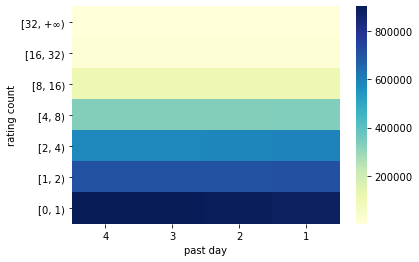

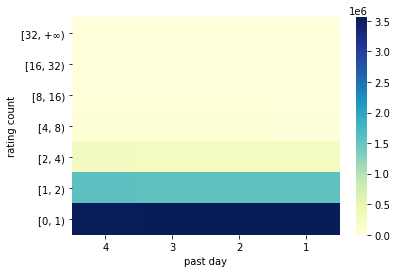

In [20]:
candidates = []
non_candidates = []
past_day_num = 4
for i in range(7):
    candidates.append([0] * past_day_num)
    non_candidates.append([0] * past_day_num)
fir = datetime.date(2009, 11, 1)
ini = datetime.date(2014, 11, 1)
gap = (ini - fir).days
end = datetime.date(2019, 10, 31)
for i in range(0, (end - ini).days + 1):
    cur = ini + datetime.timedelta(i)
    ratings = daily_ratings.get((cur.year, cur.month, cur.day), -1)
    if ratings != -1: 
        possible_candidates = set()
        actual_rated = set()
        for movie in ratings:
            actual_rated.add(movie)
        for j in range(past_day_num, 0, -1):
            pre = cur - datetime.timedelta(j)
            ratings = daily_ratings.get((pre.year, pre.month, pre.day), -1)
            if ratings != -1:
                for movie in ratings:
                    possible_candidates.add(movie)
        for movie in possible_candidates:
            timeline = movie_timeline[movie][gap + i - past_day_num: gap + i]
            if movie in actual_rated:
                for k in range(0, past_day_num):
                    y_range = range_lookup(timeline[k])
                    candidates[y_range][k] += 1
            else:
                for k in range(0, past_day_num):
                    y_range = range_lookup(timeline[k])
                    non_candidates[y_range][k] += 1
    else:
        print('invalid', cur.year, cur.month, cur.day)
past_day_num = 4
fig, ax = plt.subplots()
ax = sns.heatmap(candidates, cmap="YlGnBu")
ax.set_xticklabels([str(i) for i in range(past_day_num, 0, -1)])
ax.set_yticklabels(['[32, +∞)', '[16, 32)', '[8, 16)', '[4, 8)', '[2, 4)', '[1, 2)', '[0, 1)'],
                   rotation='horizontal')
ax.set_xlabel('past day')
ax.set_ylabel('rating count')
fig.savefig('./figures/candidate_movie_time_series4.png', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots()
ax = sns.heatmap(non_candidates, cmap="YlGnBu")
ax.set_xticklabels([str(i) for i in range(past_day_num, 0, -1)])
ax.set_yticklabels(['[32, +∞)', '[16, 32)', '[8, 16)', '[4, 8)', '[2, 4)', '[1, 2)', '[0, 1)'],
                   rotation='horizontal')
ax.set_xlabel('past day')
ax.set_ylabel('rating count')
fig.savefig('./figures/non_candidate_movie_time_series4.png', bbox_inches='tight', dpi=300)

<ipython-input-27-80783cc7ea56>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + [(len(movie_timeline[2571]) // 2 -


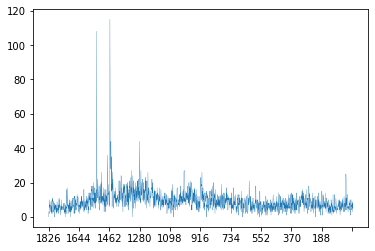

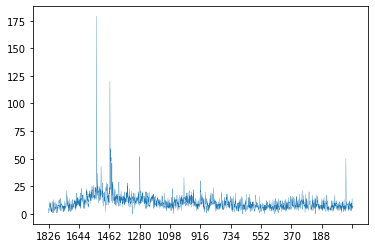

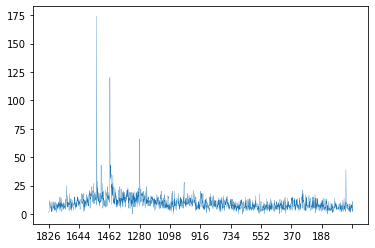

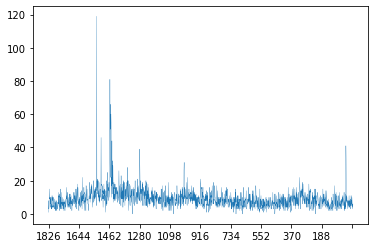

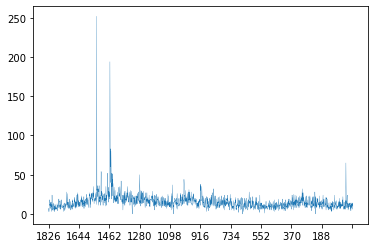

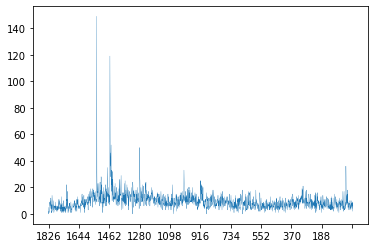

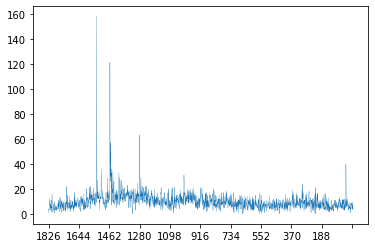

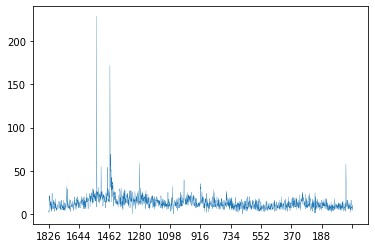

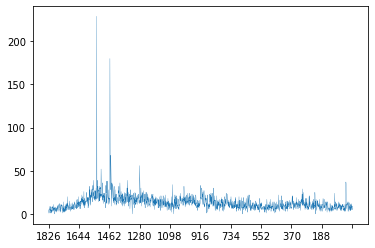

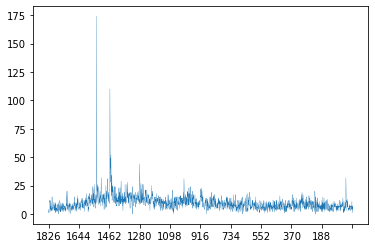

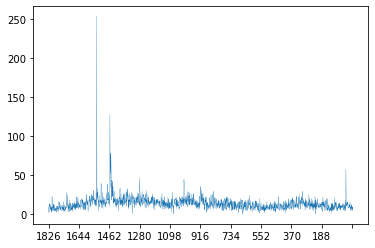

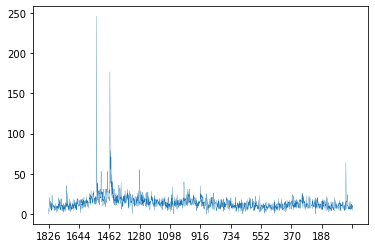

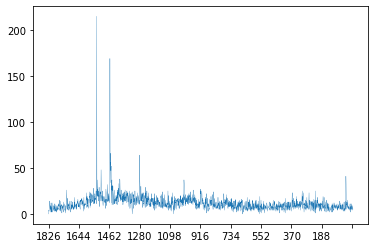

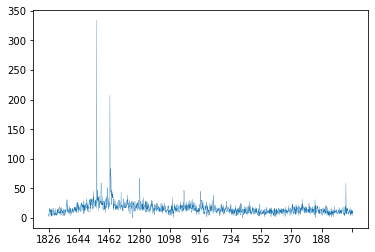

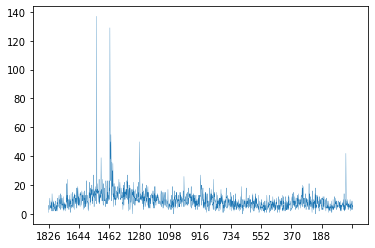

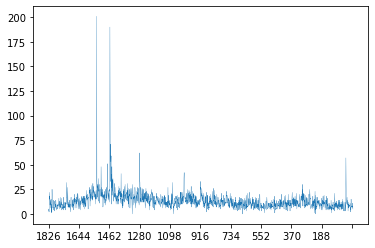

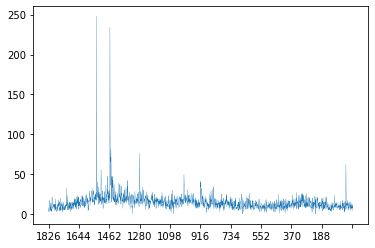

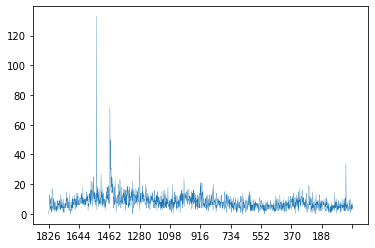

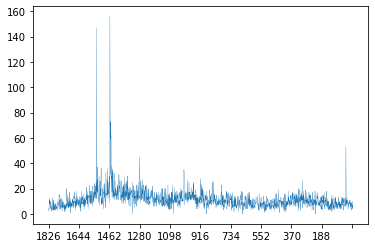

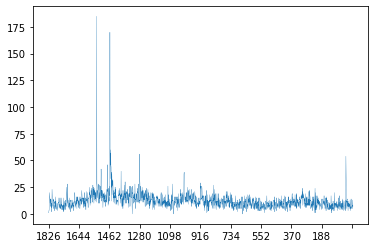

In [27]:
movie_timeline = np.load(os.path.join('data', 'movie_timeline.npy'), allow_pickle=True).tolist()
# R_list = []
# ini = datetime.date(2009, 11, 1)
# end = datetime.date(2019, 10, 31)
# for i in range(0, (end - ini).days + 1):
#     cur = ini + datetime.timedelta(i)
#     date = (cur.year, cur.month, cur.day)
#     ratings = daily_ratings.get(date, -1)
#     if ratings != -1:
#         user_activities = getUserActivities(ratings)
#         for user in user_activities:
#             movies = user_activities[user]
#             R_list.append(len(movies))
# fig, ax = plt.subplots()
# ax.hist(R_list, bins=np.logspace(np.log10(1),np.log10(5000), 20))
# print(len(R_list))
# plt.xscale('log')
# ax.set_xlabel('number of ratings provided by user in one day')
# ax.set_ylabel('occurrence' )
# fig.savefig('./figures/R_pattern', bbox_inches='tight', dpi=300)

# rating_permovie_perday = []
# for movie in movie_timeline:
#     for num in movie_timeline[movie]:
#         if num != 0:
#             rating_permovie_perday.append(num)
# fig, ax = plt.subplots()
# ax.hist(rating_permovie_perday, bins=np.logspace(np.log10(1),np.log10(200), 10))
# plt.xscale('log')
# ax.set_xlabel('number of ratings received by movie in one day')
# ax.set_ylabel('occurrence' )
# fig.savefig('./figures/movie_received_pattern', bbox_inches='tight', dpi=300)

temp_x = [i for i in range(len(movie_timeline[2571]) // 2)]
temp_mkeys = mostPop(daily_ratings, 20, (2019, 1, 1))
x_loc = plticker.MultipleLocator(base=(len(movie_timeline[2571]) // 2 // 10))
# y_loc = plticker.MultipleLocator(base=10)
for movie in random.sample(temp_mkeys, 20):
    fig, ax = plt.subplots()
    ax.xaxis.set_major_locator(x_loc)
#     ax.yaxis.set_major_locator(y_loc)
    ax.plot(temp_x, movie_timeline[movie][len(movie_timeline[2571])
                                         - len(movie_timeline[2571]) // 2:], linewidth=0.3)
    ax.set_xticklabels([''] + [(len(movie_timeline[2571]) // 2 - 
                                len(movie_timeline[2571]) // 2 //
                                10 * i) for i in range(10)])


<ipython-input-26-9d0608ca705a>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(year_x)


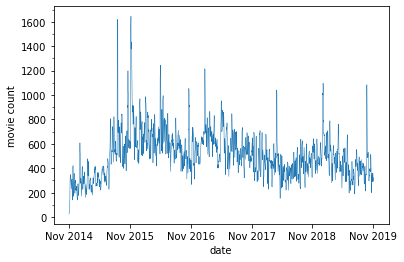

In [26]:
past_day_num = 4
fir = datetime.date(2009, 11, 1)
ini = datetime.date(2014, 11, 1)
gap = (ini - fir).days
end = datetime.date(2019, 10, 31)
all_movie_after_selection = []
for i in range(0, (end - ini).days + 1):
    cur = ini + datetime.timedelta(i)
    movie_after_selection = 0
    possible_candidates = set()
    for j in range(past_day_num, 0, -1):
        pre = cur - datetime.timedelta(j)
        ratings = daily_ratings.get((pre.year, pre.month, pre.day), -1)
        if ratings != -1:
            for movie in ratings:
                possible_candidates.add(movie)
    for movie in possible_candidates:
        timeline = movie_timeline[movie][i + gap - past_day_num: i + gap]
        if max(timeline) >= 4:
            movie_after_selection += 1
    all_movie_after_selection.append(movie_after_selection)
year_x = ['']
for year in range(2014, 2020):
    year_x.append('Nov ' + str(year))
year_x[0] = 'Nov 2014'
temp_x = [i for i in range(0, (end - ini).days + 1)]
fig, ax = plt.subplots()
x_loc = plticker.MultipleLocator(base=((end - ini).days + 1) // 5)
y_loc = plticker.MultipleLocator(base=200)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
ax.yaxis.set_minor_locator(plticker.MultipleLocator(100))
ax.plot(temp_x, all_movie_after_selection, linewidth=0.5)
ax.set_xticklabels(year_x)
ax.set_xlabel('date')
ax.set_ylabel('movie count' )
fig.savefig('./figures/movie_after_selection', bbox_inches='tight', dpi=300)

        

In [52]:
start = time.time()
from sklearn.linear_model import LinearRegression
time_dic = {
    2015:[(2014, 11), (2014, 12)] + ([(2015, m) for m in range(1, 11)]),
    2016:[(2015, 11), (2015, 12)] + ([(2016, m) for m in range(1, 11)]),
    2017:[(2016, 11), (2016, 12)] + ([(2017, m) for m in range(1, 11)]),
    2018:[(2017, 11), (2017, 12)] + ([(2018, m) for m in range(1, 11)]),
    2019:[(2018, 11), (2018, 12)] + ([(2019, m) for m in range(1, 11)])
}
movie_timeline = np.load(os.path.join('data', 'movie_timeline.npy'), allow_pickle=True).tolist()
ini = datetime.date(2009, 11, 1)
day_aves = []
timeline_param_list = [4, 8, 16, 32, 64]
for past_day_num in timeline_param_list:
    day_ave = {}
    for _year in range(2015, 2020):
        for year, month in time_dic[_year]:
            for day in range(1, 32):
                date = (year, month, day)
                ratings = daily_ratings.get(date, -1) 
                if ratings == -1:
                    print('date', date, 'invalid')
                    continue
                cur = datetime.date(year, month, day)
                user_activities = getUserActivities(daily_ratings[date])
                max_R = getMaxR(user_activities)

                # pre selection
                possible_candidates = {}
                for j in range(past_day_num, 0, -1):
                    pre = cur - datetime.timedelta(j)
                    ratings = daily_ratings.get((pre.year, pre.month, pre.day), -1)
                    if ratings != -1:
                        for movie in ratings:
                            if movie in possible_candidates:
                                continue
                            i = (cur - ini).days
                            timeline = movie_timeline[movie][i - past_day_num: i]
                            if max(timeline) >= 4:
                                train_x = [[i] for i in range(1, past_day_num + 1)]
                                train_y = timeline
                                linear_model = LinearRegression().fit(train_x, train_y)
                                predicted_pop = float(linear_model.predict([[past_day_num + 1]])[0])
                                possible_candidates[movie] = predicted_pop

                timelinePop = getTopN(possible_candidates, max_R)
                R_precision = RPrecision(user_activities, timelinePop),
                day_ave[date] = R_precision
    day_aves.append(day_ave)
np.save(os.path.join('data', 'day_ave_timeline_algo.npy'), day_aves)
end = time.time()
elapse = end - start
print(elapse)

date (2014, 11, 31) invalid
date (2015, 2, 29) invalid
date (2015, 2, 30) invalid
date (2015, 2, 31) invalid
date (2015, 4, 31) invalid
date (2015, 6, 31) invalid
date (2015, 9, 31) invalid
date (2015, 11, 31) invalid
date (2016, 2, 30) invalid
date (2016, 2, 31) invalid
date (2016, 3, 17) invalid
date (2016, 4, 31) invalid
date (2016, 6, 31) invalid
date (2016, 9, 31) invalid
date (2016, 11, 31) invalid
date (2017, 2, 29) invalid
date (2017, 2, 30) invalid
date (2017, 2, 31) invalid
date (2017, 4, 31) invalid
date (2017, 6, 31) invalid
date (2017, 9, 31) invalid
date (2017, 11, 31) invalid
date (2018, 1, 7) invalid
date (2018, 1, 8) invalid
date (2018, 2, 29) invalid
date (2018, 2, 30) invalid
date (2018, 2, 31) invalid
date (2018, 4, 31) invalid
date (2018, 6, 31) invalid
date (2018, 9, 31) invalid
date (2018, 11, 31) invalid
date (2019, 2, 29) invalid
date (2019, 2, 30) invalid
date (2019, 2, 31) invalid
date (2019, 4, 31) invalid
date (2019, 6, 31) invalid
date (2019, 9, 31) invali

In [55]:
day_aves = np.load(os.path.join('data', 'day_aves.npy'), allow_pickle=True).tolist()
timeline_aves = np.load(os.path.join('data', 'day_ave_timeline_algo.npy'), allow_pickle=True).tolist()
month_aves = []
year_aves = []
yearly_pattern = []
monthly_pattern = []
weekday_pattern = []
timeline_year_aves = []
timeline_month_aves = []
for timeline_ave in timeline_aves:
    year_ave_per_param = []
    month_ave_per_param = []
    for _year in range(2015, 2020):
        year_value = []
        for year, month in time_dic[_year]:
            month_value = []
            for day in range(1, 32):
                value = timeline_ave.get((year, month, day), -1)
                if value != -1:
                    year_value.append(value[0])
                    month_value.append(value[0])
            month_ave_per_param.append(sum(month_value) / len(month_value) * 100)
        year_ave_per_param.append("%.3f" % (sum(year_value) / len(year_value) * 100))
    timeline_year_aves.append(year_ave_per_param)
    timeline_month_aves.append(month_ave_per_param)

for method in range(0, 4):
    year_ave_per_method = []
    month_ave_per_method = []
    weekday_pattern_per_method = [[] for i in range(7)]
    monthly_pattern_per_method = [[] for i in range(12)]
    yearly_pattern_per_method = [[] for i in range(5)]
    for day_ave in day_aves:
        for _year in range(2015, 2020):
            year_value = []
            for year, month in time_dic[_year]:
                month_value = []
                for day in range(1, 32):
                    value = day_ave.get((year, month, day), -1)
                    if method == 3: #timeline
                        value = timeline_aves[2].get((year, month, day), -1)
                    if value != -1:
                        weekday = datetime.date(year, month, day).weekday()
                        if day_ave == day_aves[2] and (method == 1 or method == 0): # deltat = 4
                            month_value.append(value[method])
                            year_value.append(value[method])
                            weekday_pattern_per_method[weekday].append(value[method])
                            monthly_pattern_per_method[month - 1].append(value[method])
                            yearly_pattern_per_method[_year - 2015].append(value[method])
                        if day_ave == day_aves[3] and method == 2: # deltat = 8
                            month_value.append(value[method])
                            year_value.append(value[method])
                            weekday_pattern_per_method[weekday].append(value[method])
                            monthly_pattern_per_method[month - 1].append(value[method])
                            yearly_pattern_per_method[_year - 2015].append(value[method])
                        if method == 3: #timeline
                            month_value.append(value[0])
                            year_value.append(value[0])
                            weekday_pattern_per_method[weekday].append(value[0])
                            monthly_pattern_per_method[month - 1].append(value[0])
                            yearly_pattern_per_method[_year - 2015].append(value[0])
                if month_value != []:
                    month_ave_per_method.append(sum(month_value) / len(month_value) * 100)
            if year_value != []:
                year_ave_per_method.append("%.3f" % (sum(year_value) / len(year_value) * 100))
        if method == 3:
            break
    year_aves.append(year_ave_per_method)
    month_aves.append(month_ave_per_method)
    weekday_pattern.append([(sum(v) / len(v) * 100) for v in weekday_pattern_per_method])
    monthly_pattern.append([(sum(v) / len(v) * 100) for v in monthly_pattern_per_method])
    yearly_pattern.append([(sum(v) / len(v) * 100) for v in yearly_pattern_per_method])
methods = ['mostPop', 'recentPop', 'decayPop']
colors = ['r', 'b', 'g', 'k']
# print(year_aves)
# print(month_aves)

<ipython-input-56-36193161046d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(year_x)


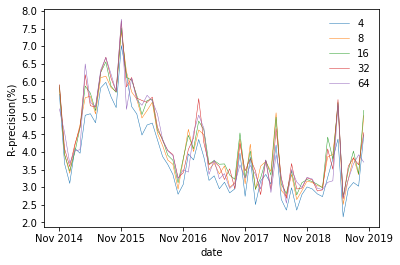

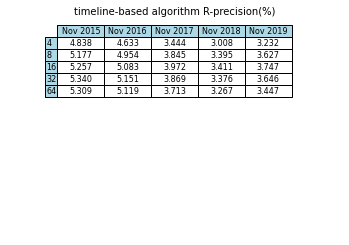

In [56]:
year_x = ['']
temp_x = [i for i in range(0, 60)]
for year in range(2014, 2020):
    year_x.append('Nov ' + str(year))
fig, ax = plt.subplots()
x_loc = plticker.MultipleLocator(base=12)
y_loc = plticker.MultipleLocator(base=0.5)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
for j in range(0, len(timeline_param_list)):
    param = timeline_param_list[j]
    ax.plot(temp_x, timeline_month_aves[j], linewidth=0.5, label=str(param))
ax.legend(loc='upper right', frameon=False)
ax.set_xticklabels(year_x)
ax.set_xlabel('date')
ax.set_ylabel('R-precision(%)' )
fig.savefig('./figures/monthly_average_timeline', bbox_inches='tight', dpi=300)

fig, ax = plt.subplots() 
ax.set_axis_off() 
ax.set_title('timeline-based algorithm' + ' R-precision(%)', loc='center', fontsize=10)
table = ax.table(
    cellText = timeline_year_aves,
    rowLabels = timeline_param_list,
    colLabels = ['Nov ' + str(year) for year in range(2015, 2021)],
    rowColours = ["lightblue"] * len(timeline_year_aves),  
    colColours = ["lightblue"] * len(timeline_year_aves[0]), 
    colWidths= [0.14] * len(timeline_year_aves[0]),
    cellLoc ='center',
    loc ='upper center',
)
bbox = table.get_window_extent(fig.canvas.get_renderer())
bbox = bbox.from_extents(bbox.xmin-5, bbox.ymin-5, bbox.xmax+5, bbox.ymax+25)
bbox_inches = bbox.transformed(fig.dpi_scale_trans.inverted())
fig.savefig('./figures/yearly_average_timeline', bbox_inches=bbox_inches, dpi=300)

<ipython-input-57-4416e15de6da>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(year_x)


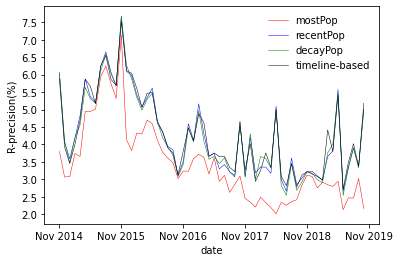

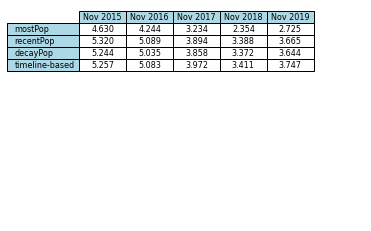

In [57]:
# plot monthly average
methods = ['mostPop', 'recentPop', 'decayPop', 'timeline-based']
year_x = ['']
for year in range(2014, 2020):
    year_x.append('Nov ' + str(year))
year_x[0] = 'Nov 2014'
temp_x = [i for i in range(0, 60)]
fig, ax = plt.subplots()
x_loc = plticker.MultipleLocator(base=12)
y_loc = plticker.MultipleLocator(base=0.5)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
for i in range(0, len(methods)):
    ax.plot(temp_x, month_aves[i], color=colors[i], linewidth=0.5, label=str(methods[i]))
    ax.legend(loc='upper right', frameon=False)
    ax.set_xticklabels(year_x)
    ax.set_xlabel('date')
    ax.set_ylabel('R-precision(%)' )
fig.savefig('./figures/monthly_average_4_methods', bbox_inches='tight', dpi=300)

# plot yearly average
fig, ax = plt.subplots() 
ax.set_axis_off() 
table = ax.table(
    cellText = year_aves,
    rowLabels = ['mostPop', 'recentPop', 'decayPop', 'timeline-based'],
    colLabels = ['Nov ' + str(year) for year in range(2015, 2021)],
    rowColours = ["lightblue"] * len(year_aves),  
    colColours = ["lightblue"] * len(year_aves[0]), 
    colWidths= [0.14] * len(year_aves[0]),
    cellLoc ='center',
    loc ='upper center',
)
bbox = table.get_window_extent(fig.canvas.get_renderer())
bbox = bbox.from_extents(bbox.xmin-5, bbox.ymin-5, bbox.xmax+5, bbox.ymax+25)
bbox_inches = bbox.transformed(fig.dpi_scale_trans.inverted())
fig.savefig('./figures/yearly_average_4_methods', bbox_inches=bbox_inches, dpi=300)


<ipython-input-58-7e0ec1a1a926>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
<ipython-input-58-7e0ec1a1a926>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.',
<ipython-input-58-7e0ec1a1a926>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])


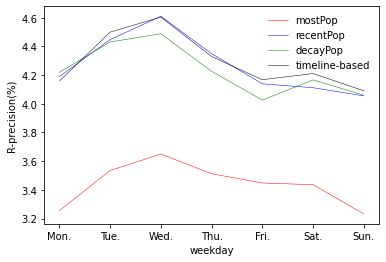

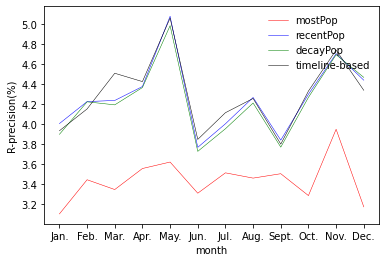

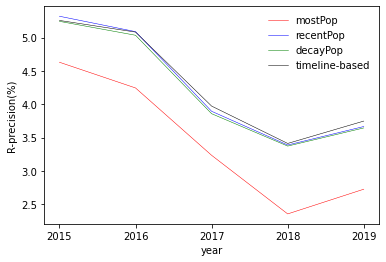

In [58]:
# weekday_pattern
fig, ax = plt.subplots()
temp_x = [i for i in range(7)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=0.2)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
# ax.set_title('weekday pattern', loc='center')
for i in range(4):
    ax.plot(temp_x,
            weekday_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax.set_xticklabels(['', 'Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.', 'Sat.', 'Sun.'])
ax.legend(loc='upper right', frameon=False)
ax.set_xlabel('weekday')
ax.set_ylabel('R-precision(%)')
fig.savefig('./figures/weekday_pattern_4_methods', bbox_inches='tight', dpi=300)

# monthly_pattern
fig, ax = plt.subplots()
temp_x = [i for i in range(12)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=0.2)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
# ax.set_title('monthly pattern', loc='center')
for i in range(4):
    ax.plot(temp_x,
            monthly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax.set_xticklabels(['', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May.', 'Jun.', 'Jul.', 
                    'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.'])
ax.legend(loc='upper right', frameon=False)
ax.set_xlabel('month')
ax.set_ylabel('R-precision(%)' )
fig.savefig('./figures/monthly_pattern_4_methods', bbox_inches='tight', dpi=300)

# yearly_pattern
fig, ax = plt.subplots()
temp_x = [i for i in range(5)]
x_loc = plticker.MultipleLocator(base=1)
y_loc = plticker.MultipleLocator(base=0.5)
ax.xaxis.set_major_locator(x_loc)
ax.yaxis.set_major_locator(y_loc)
# ax.set_title('yearly pattern', loc='center')
for i in range(4):
    ax.plot(temp_x,
            yearly_pattern[i],
            color=colors[i], linewidth=0.5, label = methods[i])
ax.set_xticklabels(['', '2015', '2016', '2017', '2018', '2019'])
ax.legend(loc='upper right', frameon=False)
ax.set_xlabel('year')
ax.set_ylabel('R-precision(%)' )
fig.savefig('./figures/yearly_pattern_4_methods', bbox_inches='tight', dpi=300)